# Volume 4: Introduction to Initial and Boundary Value Problems
    Daniel Perkins
    MATH 437
    8/2/24

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

### Problem 1
Use `solve_ivp` to solve for $y$ in the equation $y'' - y = sin(t)$ with initial conditions $y(0)= -\frac{1}{2}$, $y'(0) = 0$ and plot your solution on the interval $[0,5]$. Compare this to the analytic solution $y=-\frac{1}{2}(e^{-t}+sin(t))$. 

Note: Using max_step = 0.1 with give you a smoother graph here

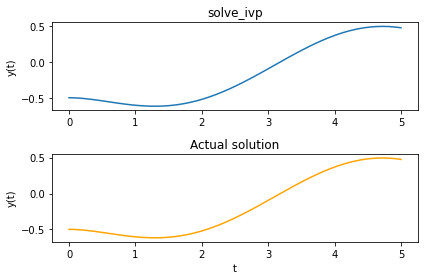

In [12]:
# element 1: the ODE function
def ode(t, y):
    '''defines the ode system'''
    return np.array([y[1], np.sin(t) + y[0]])
# element 2: the time domain
t_span = (0,5)
# element 3: the initial conditions
y0 = np.array([-1./2, 0])
# solve the system
sol = solve_ivp(ode, t_span, y0, max_step=0.1)

# Analytic Solution
ts = np.linspace(0, 5, 500)
ys = -0.5 * (np.exp(-ts) + np.sin(ts))

plt.subplot(211)
plt.title("solve_ivp")
plt.ylabel("y(t)")
plt.plot(sol.t,sol.y[0])
plt.subplot(212)
plt.title("Actual solution")
plt.plot(ts, ys, c="orange")  # It looks exactly the same
plt.ylabel("y(t)")
plt.xlabel('t')
plt.tight_layout()
plt.show()

### Problem 2

Use `solve_bvp` to solve for $y$ in the equation $y'+y''=-\frac{1}{4}e^{-0.5t}+sin(t)-cos(t)$ with boundary conditions $y(0)=6$ and $y'(5)=-0.324705$ and plot your solution on the interval $[0,5]$. Use an initial guess of all ones. Compare this to the analytic solution $y =e^{-0.5t}-sin(t)+5$. 

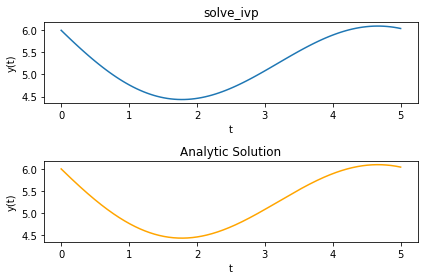

In [23]:
# element 1: the ODE function
def ode(t, y):
    '''defines the ode system'''
    return np.array([y[1], -.25*np.exp(-.5*t) + np.sin(t) - np.cos(t) - y[1]])
# element 2: the boundary condition function
def bc(ya,yb):
    ''' define the boundary conditions '''
    return np.array([ya[0] - 6, yb[1] + 0.324705])
# element 3: the time domain.
t_steps = 100
t = np.linspace(0,5,t_steps)
# element 4: the initial guess.
y0 = np.ones((2,t_steps))
# Solve the system.
sol = solve_bvp(ode, bc, t, y0)

# Analytic Solution
ts = np.linspace(0, 5, 500)
ys = np.exp(-.5*ts) - np.sin(ts)  + 5

plt.subplot(211)
plt.title("solve_ivp")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.plot(sol.x, sol.y[0])
plt.subplot(212)
plt.title("Analytic Solution")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.plot(ts, ys, c="orange")
plt.tight_layout()
plt.show()



### Problem 3

Use `solve_bvp` to solve for $y$ in the equation $y''=(1-y')*10y$ with boundary conditions $y(0)=-1$ and $y(1)=\frac{3}{2}$ and plot your solution on the interval $[0,1]$. Use an initial guess of 10. Compare this to the the same solution using an initial guess of 9.99. For both of your initial guesses, use 50 steps in $t$.

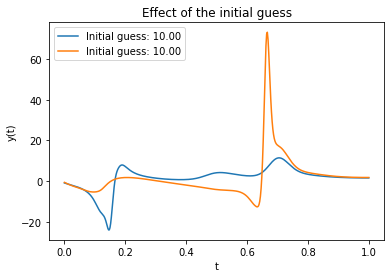

In [29]:
# element 1: the ODE function
def ode(t, y):
    '''defines the ode system'''
    return np.array([y[1], (1-y[1]) * 10*y[0]])
# element 2: the boundary condition function
def bc(ya,yb):
    ''' define the boundary conditions '''
    return np.array([ya[0] + 1, yb[0] - 3./2])
# element 3: the time domain.
t_steps = 50
t = np.linspace(0,1,t_steps)
# element 4: the initial guess.
y0 = np.ones((2,t_steps))*10
# Solve the system.
sol = solve_bvp(ode, bc, t, y0)

# Solve system with different initial guess
y02 = np.ones((2,t_steps))*9.99
sol2 = solve_bvp(ode, bc, t, y02)

# Plot it
plt.title("Effect of the initial guess")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.plot(sol.x, sol.y[0], label="Initial guess: 10.00")
plt.plot(sol2.x, sol2.y[0], label="Initial guess: 10.00")
plt.legend()
plt.show()



### Problem 4
Use `solve_ivp` to solve the Four-Wing Attractor as described in equations (1.2), (1.3), and (1.4) where $a=0.2$, $b = 0.01$, and $c = -0.4$. Try this with 3 different initial values and plot (in three dimensions) the 3 corresponding graphs.

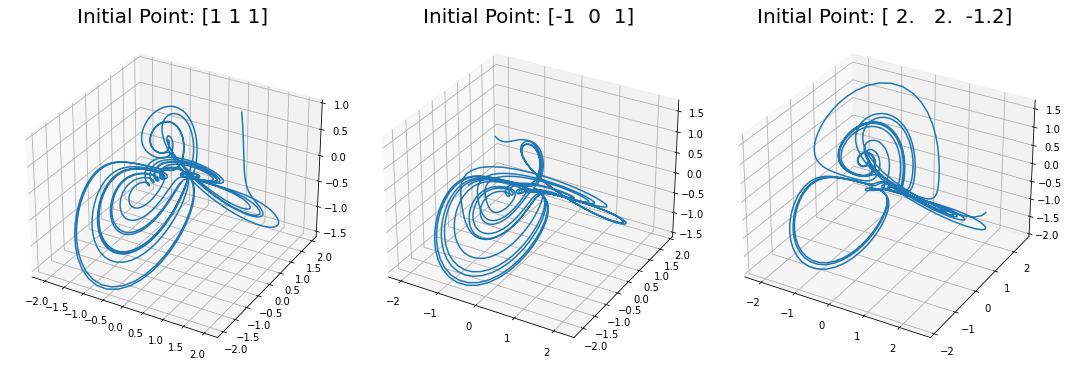

In [62]:
a, b, c = 0.2, 0.01, -0.4
# element 1: the ODE function
def ode(t, y):
    '''defines the ode system'''
    return np.array([a*y[0] + y[1]*y[2], b*y[0] + c*y[1] - y[0]*y[2], -y[2] - y[0]*y[1]])
# element 2: the time domain
t_span = (0,400)
# element 3: the initial conditions
y01 = np.array([1,1,1])
y02 = np.array([-1,0,1])
y03 = np.array([2,2,-1.2])
# solve the systems
sol1 = solve_ivp(ode, t_span, y01, max_step=0.1)
sol2 = solve_ivp(ode, t_span, y02, max_step=0.1)
sol3 = solve_ivp(ode, t_span, y03, max_step=0.1)

# plot it
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
ax1.set_title(f"Initial Point: {y01}", fontsize=20)
ax1.plot(sol1.y[0],sol1.y[1],sol1.y[2])
ax2.set_title(f"Initial Point: {y02}", fontsize=20)
ax2.plot(sol2.y[0],sol2.y[1],sol2.y[2])
ax3.set_title(f"Initial Point: {y03}", fontsize=20)
ax3.plot(sol3.y[0],sol3.y[1],sol3.y[2])
# plt.subplots_adjust(wspace=3, hspace=3)
plt.tight_layout()
plt.show()

## Problem 5

Write a function that uses `solve_bvp` to find $\psi$ and $E$ that are solutions to the Schroedinger equation for the potential $U(x)=x^2$ and with boundary conditions $\psi(-1)=\psi(1)=0, \psi'(-1)=1$.
By varying your initial guess for $E$, use your function to find solutions for several different values of $E$, and plot them together. Label the solutions with the values of $E$ that you found.

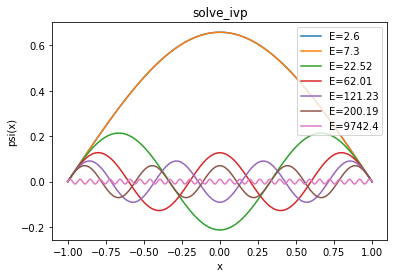

In [74]:
# element 1: the ODE function
def ode(t, y, p):  #y=psi, y=x, p=[E]
    '''defines the ode system'''
    return np.array([y[1], -p[0]*y[0] + t**2*y[0]])
# element 2: the boundary condition function
def bc(ya, yb, p):
    ''' define the boundary conditions '''
    return np.array([ya[0], yb[0], ya[1]-1])
# element 3,4: the time domain and part of the initial guess
t_steps = 100
t = np.linspace(-1,1,t_steps)
y_guess = np.ones((2,t_steps))

# Set up the plot
plt.title("solve_ivp")
plt.xlabel('x')
plt.ylabel('psi(x)')

# element 4: the initial guess.
y_guess = np.ones((2,t_steps))
for p_guess in [[2.6], [7.3], [22.52], [62.01], [121.23], [200.19], [9742.4]]:
    sol = solve_bvp(ode, bc, t, y_guess, p=p_guess) # Solve the system.
    plt.plot(sol.x, sol.y[0], label=f"E={p_guess[0]}")

plt.legend(loc="upper right")
plt.show()